# Model selection

In [55]:
import os, sys
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# import custom libraries
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)
from app.libs import data_utils, eda_tools
from app.config import SCHEMA

In [56]:
# Read data
file_path = parent_dir + '/data/processed/'
X_train = data_utils.read_data(file_path, 'X_train.csv')
X_test = data_utils.read_data(file_path, 'X_test.csv')
y_train = data_utils.read_data(file_path, 'y_train.csv')
y_test = data_utils.read_data(file_path, 'y_test.csv')
X_val = data_utils.read_data(file_path, 'X_val.csv')
y_val = data_utils.read_data(file_path, 'y_val.csv')

{"time": "2024-10-21T18:34:37Z", "level": "INFO", "log": "Reading c:\\Users\\MV\\projects\\tennis-predictor/data/processed/X_train.csv..."}
{"time": "2024-10-21T18:34:38Z", "level": "INFO", "log": "Shape of the dataset: (31491, 17)"}
{"time": "2024-10-21T18:34:39Z", "level": "INFO", "log": "Reading c:\\Users\\MV\\projects\\tennis-predictor/data/processed/X_test.csv..."}
{"time": "2024-10-21T18:34:40Z", "level": "INFO", "log": "Shape of the dataset: (3937, 17)"}
{"time": "2024-10-21T18:34:41Z", "level": "INFO", "log": "Reading c:\\Users\\MV\\projects\\tennis-predictor/data/processed/y_train.csv..."}
{"time": "2024-10-21T18:34:42Z", "level": "INFO", "log": "Shape of the dataset: (31491, 1)"}
{"time": "2024-10-21T18:34:43Z", "level": "INFO", "log": "Reading c:\\Users\\MV\\projects\\tennis-predictor/data/processed/y_test.csv..."}
{"time": "2024-10-21T18:34:44Z", "level": "INFO", "log": "Shape of the dataset: (3937, 1)"}
{"time": "2024-10-21T18:34:45Z", "level": "INFO", "log": "Reading c:\\

In [57]:
# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict (outputs probabilities; apply threshold 0.5)
y_pred = (model.predict_proba(X_test)[:, 1] >= 0.5).astype(int)

C:\Users\MV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9169418338836678


C:\Users\MV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
odd_p1 = X_test['odd_p1'].values
odd_p2 = X_test['odd_p2'].values

# Determine the odds based on predictions
selected_odds = np.where(y_pred == 1, odd_p1, odd_p2)

# Convert y_pred and y_test to Series for easier indexing
y_pred_series = pd.Series(np.array(y_pred))
y_test_series = pd.Series(y_test['winner_is_p1'].values)

# Split odds into correct and incorrect predictions
correct_odds = selected_odds[y_pred_series == y_test_series]
incorrect_odds = selected_odds[y_pred_series != y_test_series]

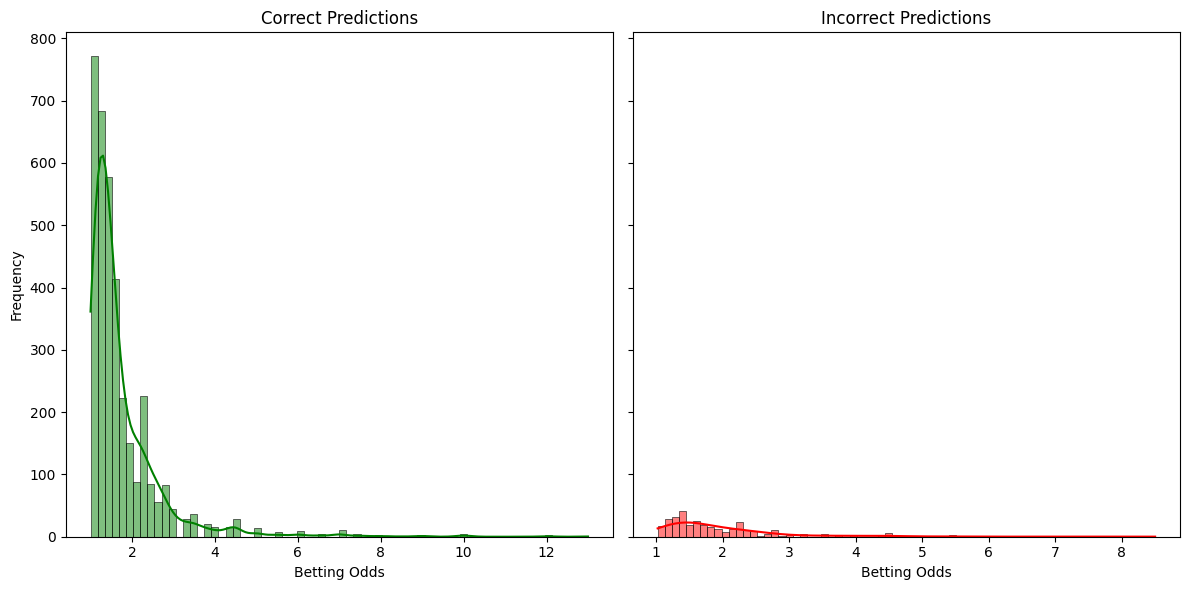

In [37]:
# Plot histograms for correct and incorrect predictions
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Histogram for correct predictions
sns.histplot(correct_odds, bins=70, kde=True, ax=axes[0], color='green')
axes[0].set_title('Correct Predictions')
axes[0].set_xlabel('Betting Odds')
axes[0].set_ylabel('Frequency')

# Histogram for incorrect predictions
sns.histplot(incorrect_odds, bins=70, kde=True, ax=axes[1], color='red')
axes[1].set_title('Incorrect Predictions')
axes[1].set_xlabel('Betting Odds')

plt.tight_layout()
plt.show()

In [54]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Accuracy: {accuracy_score(y_val, y_pred)}')
print(f'Accuracy: {len(correct_odds) / (len(correct_odds) + len(incorrect_odds))}')



ValueError: Found input variables with inconsistent numbers of samples: [3937, 3936]

In [41]:
len(correct_odds)

3610

In [42]:
len(incorrect_odds)

327

In [43]:
correct_odds

array([2.75, 1.39, 1.22, ..., 1.11, 1.36, 2.25])

In [44]:
correct_odds - 1

array([1.75, 0.39, 0.22, ..., 0.11, 0.36, 1.25])

In [48]:
(correct_odds - 1).sum()

np.float64(2678.917)

In [49]:
(correct_odds - 1).sum() - len(incorrect_odds)

np.float64(2351.917)

In [50]:


odd_p1 = X_val['odd_p1'].values
odd_p2 = X_val['odd_p2'].values

y_pred_val = (model.predict_proba(X_val)[:, 1] >= 0.5).astype(int)

# Determine the odds based on predictions
selected_odds = np.where(y_pred_val == 1, odd_p1, odd_p2)

# Convert y_pred and y_test to Series for easier indexing
y_pred_series = pd.Series(np.array(y_pred_val))
y_val_series = pd.Series(y_val['winner_is_p1'].values)

# Split odds into correct and incorrect predictions
correct_odds = selected_odds[y_pred_series == y_val_series]
incorrect_odds = selected_odds[y_pred_series != y_val_series]

{"time": "2024-10-21T18:07:23Z", "level": "INFO", "log": "Reading c:\\Users\\MV\\projects\\tennis-predictor/data/processed/X_val.csv..."}
{"time": "2024-10-21T18:07:24Z", "level": "INFO", "log": "Shape of the dataset: (3936, 17)"}
{"time": "2024-10-21T18:07:25Z", "level": "INFO", "log": "Reading c:\\Users\\MV\\projects\\tennis-predictor/data/processed/y_val.csv..."}
{"time": "2024-10-21T18:07:26Z", "level": "INFO", "log": "Shape of the dataset: (3936, 1)"}


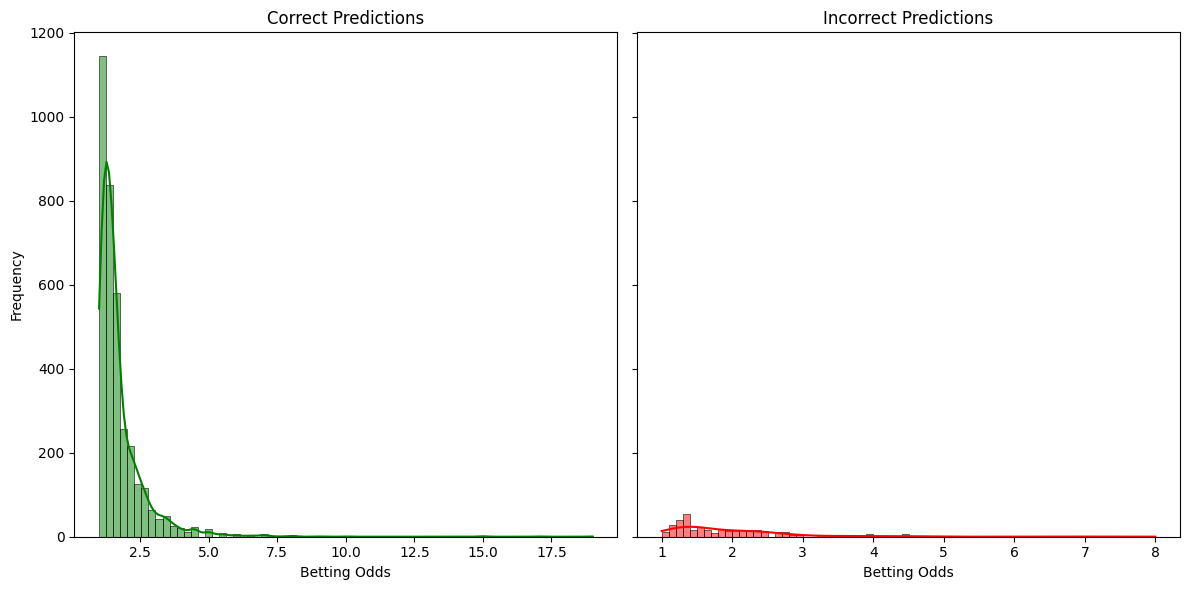

In [51]:
# Plot histograms for correct and incorrect predictions
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Histogram for correct predictions
sns.histplot(correct_odds, bins=70, kde=True, ax=axes[0], color='green')
axes[0].set_title('Correct Predictions')
axes[0].set_xlabel('Betting Odds')
axes[0].set_ylabel('Frequency')

# Histogram for incorrect predictions
sns.histplot(incorrect_odds, bins=70, kde=True, ax=axes[1], color='red')
axes[1].set_title('Incorrect Predictions')
axes[1].set_xlabel('Betting Odds')

plt.tight_layout()
plt.show()

In [52]:
(correct_odds - 1).sum() - len(incorrect_odds)

np.float64(2229.861)